In [2]:
import matplotlib.pyplot as plt
import numpy.random as npr
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from scipy.signal import convolve2d
import numpy as np
import imageio
from IPython.display import HTML
from IPython.display import Video

from scipy import fftpack
from scipy.fftpack import fft2, ifft2

%matplotlib notebook

Main class and functions of the game

In [3]:
#plot and grid have to be separate functions because of how matplotlib animations work (imshow is an artist)
def draw_plot(fig, ax, grid):
    '''
        function that draws the state of the world on a grid as a colormap
    '''
    state = np.flip(grid)
    #change the values of on and off here
    #state[state==0] = 
    #state[state==1] = 
    plt.set_cmap('gray')
    return ax.imshow(state)

def draw_grid(title=''):
    '''
        function that defines the visual properties of the grid
    '''
    fig, ax = plt.subplots()
    plt.axis('off')
    plt.grid(True)
    plt.title(title)
    return fig, ax

In [4]:
class GameOfLife:

    def __init__(self, seed, title='', display=True):
        self.state = seed
        if display:
            self.fig, self.ax = draw_grid(title)
            self.timer = self.ax.text(1, 1, '', color='white', fontsize=12) # number of generation on top of the axes

    def count_neighbors(self):
        '''
            Returns the count of alive neighbors for each cell of the grid as a 2d ndarray,
            using a convolution with periodic boundary conditions
        '''
        fmap = np.array(
            [[1, 1, 1], 
             [1, 0, 1], 
             [1, 1, 1]]
        )
        return convolve2d(self.state, fmap, mode='same', boundary='wrap') # convolution between the state and fmap

    def update(self, frame, display=True):
        '''
            Computes the state of the next generation using Conway's rules. 
            Returns the plot of the grid at the next generation with a generation counter on top
        '''
        if frame < 1:   # no movement for the first step
            self.state = seed
        else: 
            neighbors = self.count_neighbors()
            new_state = self.state.copy()
            
            for i in range(self.state.shape[0]):
                for j in range(self.state.shape[1]):
                    is_alive = self.state[i,j]
                    total = neighbors[i,j]
                    if (total < 2) or (total > 3): new_state[i,j] = 0
                    if total == 2 and is_alive == 1: new_state[i,j] = 1
                    if total == 3: new_state[i,j] = 1
            self.state = new_state
         # set the number of generation 
        if display:
            message = f"Gen.{frame}"
            self.timer.set_text(message)
            return draw_plot(self.fig, self.ax, self.state), self.timer
        else:
            return self.state

def play_gol(seed, n_gens, delta_t, title=''):
    '''
        Plays the game given the initial population(the seed) for a number of generations (n_gens)
        at period delta_t. Returns an animation FuncAnimation of plots for all the generations
    '''
    game = GameOfLife(seed, title)
    anim = FuncAnimation(game.fig, game.update, frames=n_gens, interval=delta_t)
    HTML(anim.to_jshtml());
    return anim

In [5]:
def create_pattern(size, species, offset=[0, 0], world=None):
    '''
        Add a given species to the initial seed of the game
    '''
    if world is None: world = np.zeros(size, dtype=int)
    pattern = np.zeros(size, dtype=int)
    start_row, start_col = offset[0] + size[0] // 2 - 1, offset[1] + size[1] // 2 - 1
    pattern[start_row:start_row + species.shape[0], start_col:start_col + species.shape[1]] = species # 'import' the pattern 
    return np.bitwise_or(pattern, world) 

def create_random(size, p_alive=0.5, world=None):
    '''
        Add random noise to the initial seed of the game
    '''
    if world is None: world = np.zeros(size, dtype=int) 
    random_pattern = np.random.choice(a=[0,1], size=size, p=[1-p_alive, p_alive]) # random pattern 
    return np.bitwise_or(random_pattern, world)

In [11]:
def occupancy_rate(seed, n_gens, title=''):
    
    game = GameOfLife(seed, title, display=False)

    # Lists to store generation numbers and corresponding occupancy rates
    generation_numbers = []
    occupancy_rates = []

    for frame in range(n_gens):
        # Calculate and store the occupancy rate at each generation
        total_cells = seed.size  #the dimension of the size that we chose  
        print(total_cells)
        alive_cells = np.sum(game.state[game.state==1]) #number of alive cells 
        occupancy_rate = (alive_cells / total_cells) * 100 #occupancy rate as a percentage
        occupancy_rates.append(occupancy_rate)
        generation_numbers.append(frame + 1)

        # Update the game for the next generation
        game.update(frame, display=False)
        
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(generation_numbers, occupancy_rates, linestyle='-', color='b')
    ax.set_title('Occupancy Rate Over Time')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Occupancy Rate (%)')
    ax.grid(True)
    plt.show()

In [22]:
def period_of_replication(seed, n_gens):
    
    game = GameOfLife(seed, display=False)
    current_state = np.copy(game.state)
    
    for frame in range(1, n_gens+1):
        game.update(frame, display=False)
        if np.all(game.state == seed):
            print(f"Pattern repeated after {frame} generations")
            rep = True
            break
        else:
            rep = False
    if not rep:
        print("Pattern did not repeat within the specified number of generations")

--------

Let's play Conway's game of life with a generic pattern:

<IPython.core.display.Javascript object>


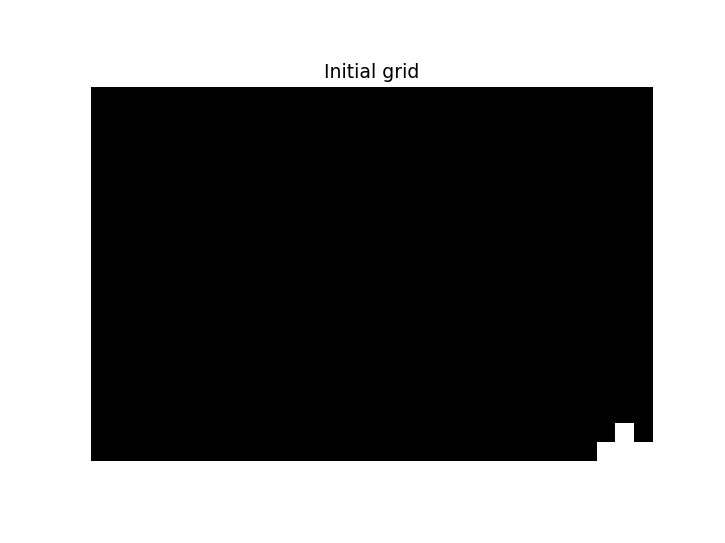

In [8]:
#initializing things
size = [20, 30] #size of the board
ON, OFF =  1, 0 # pixels values
seed = np.zeros(shape=size)

#setting seed
init = [[0,0], [0,1], [0,2], [1,1]]
for x, y in init:
  seed[x,y] = ON

#plotting initial grid
draw_plot(*draw_grid('Initial grid'), seed)

<IPython.core.display.Javascript object>


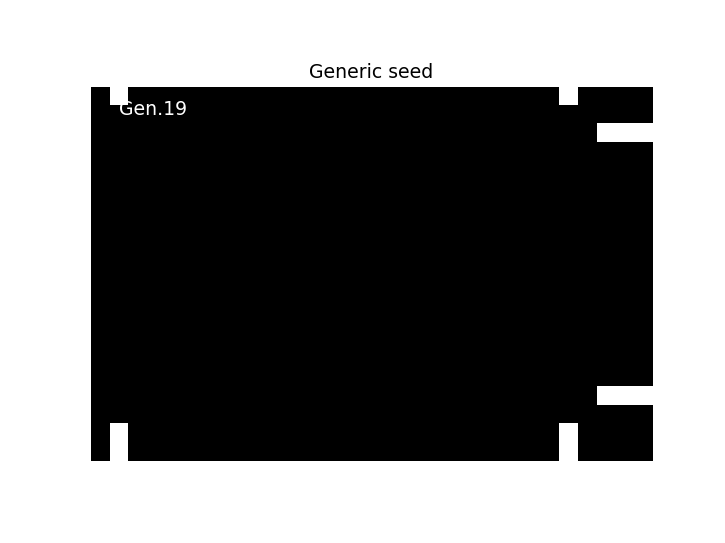

Pattern did not repeat within the specified number of generations


In [9]:
#Play the game
play_gol(seed, 20, 100, 'Generic seed')

# period
period_of_replication(seed, n_gens=40)

600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600


<IPython.core.display.Javascript object>


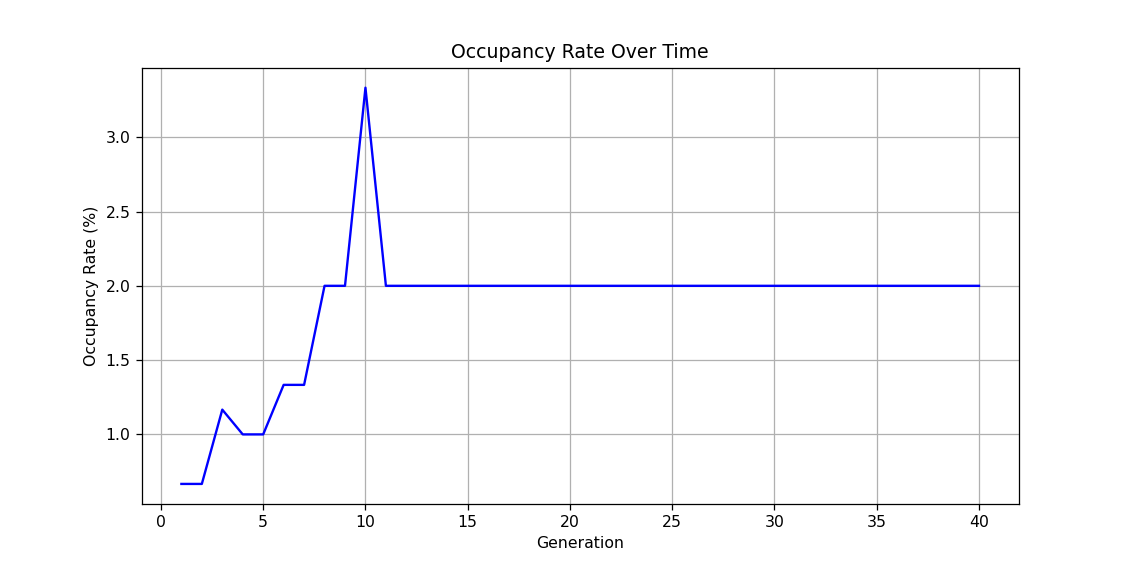

In [12]:
occupancy_rate(seed, n_gens=40)

-----------------

A *still life* is a pattern that does not change from one generation to the next, and thus may be thought of as an oscillator with period 1. Still lifes are sometimes assumed to be finite and non-empty.

Let's play Conway's Game of Life with a still life:

In [13]:
flower = np.array([[0, 1, 0], 
                   [1, 0, 1], 
                   [0, 1, 0]])

<IPython.core.display.Javascript object>


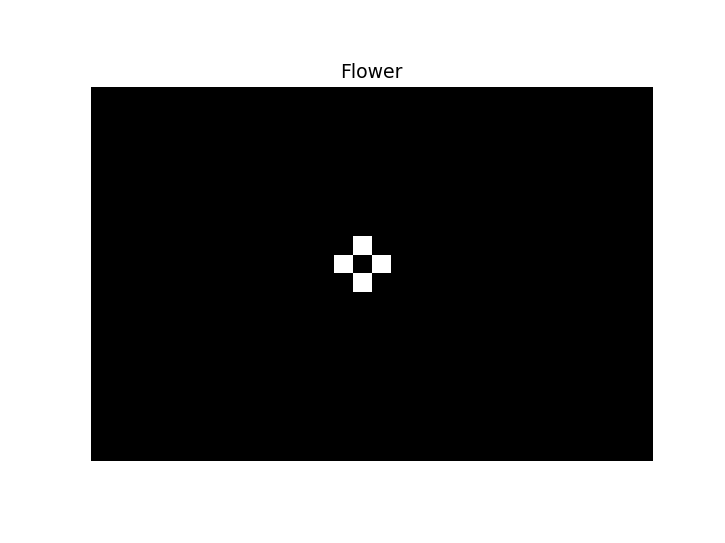

In [14]:
seed = create_pattern(size, flower)
#plotting initial grid
draw_plot(*draw_grid('Flower'), seed);

<IPython.core.display.Javascript object>


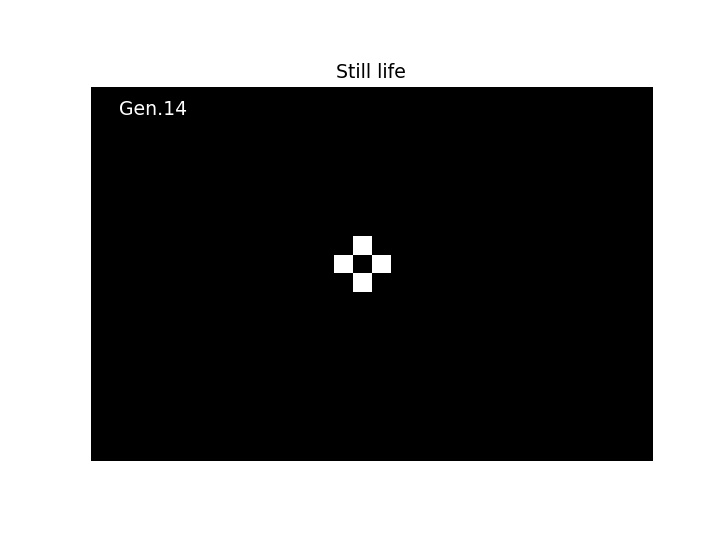

Pattern repeated after 1 generations


In [15]:
# play the game
play_gol(seed, 15, 300, 'Still life') # delta_t = 300 ms
period_of_replication(seed, n_gens=40)

600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600


<IPython.core.display.Javascript object>


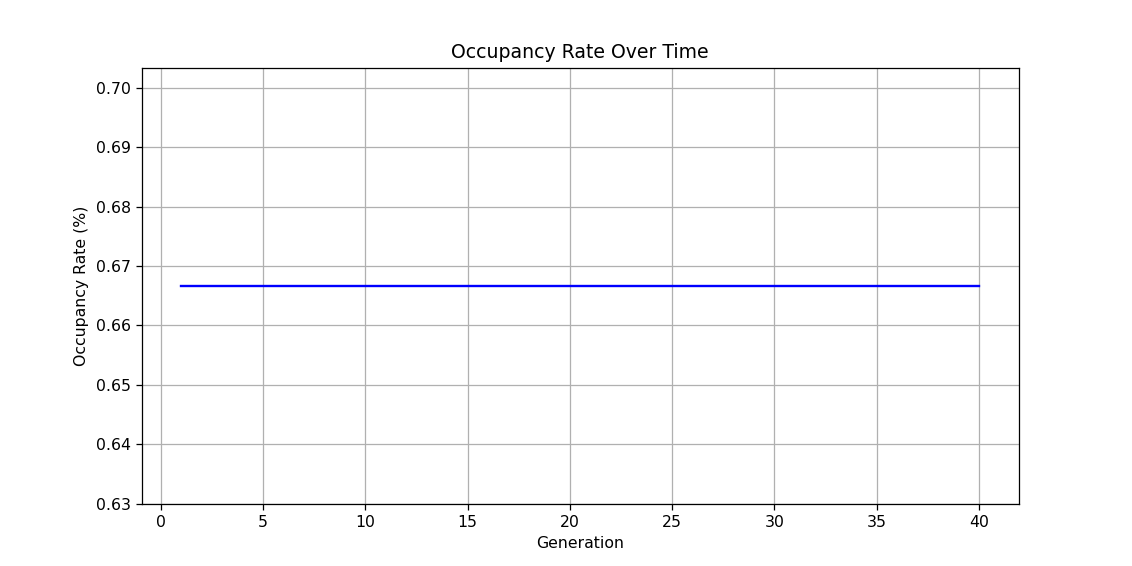

In [16]:
occupancy_rate(seed, n_gens=40)

--------------

An *oscillator* is a pattern that is a predecessor of itself. That is, it is a pattern that repeats itself after a fixed number of generations (known as its period). The term is usually restricted to finite patterns that are not still lifes, though still lifes may be thought of as oscillators with period 1.

Let's play Conway's Game of Life with an oscillator:

In [17]:
toad = np.array([[0, 1, 1, 1], 
                 [1, 1, 1, 0]])

<IPython.core.display.Javascript object>


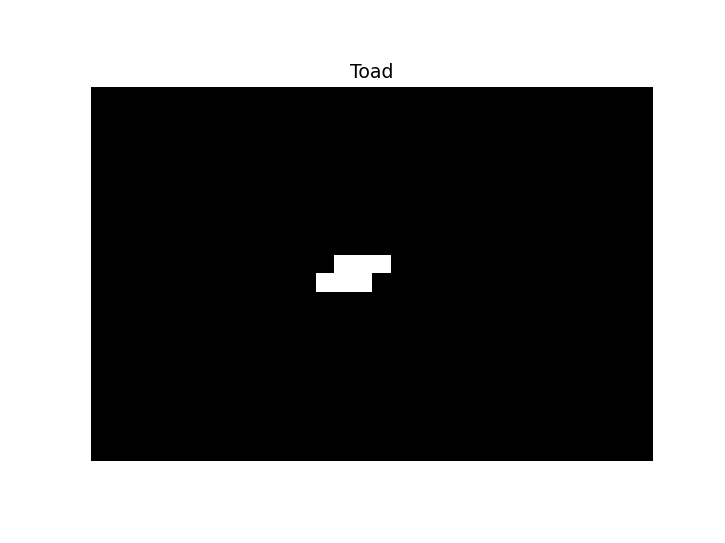

In [18]:
seed = create_pattern(size, toad)
#plotting initial grid
draw_plot(*draw_grid('Toad'), seed)

<IPython.core.display.Javascript object>


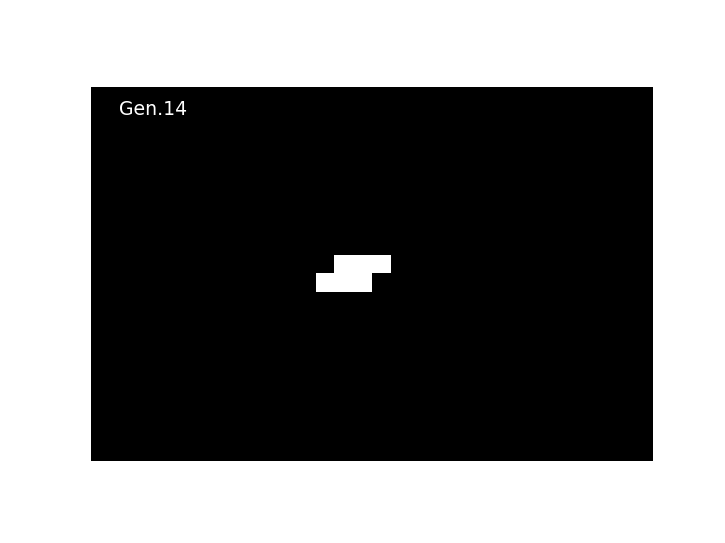

Pattern repeated after 2 generations


In [24]:
# play the game
play_gol(seed, 15, 300) # delta_t = 300 ms
period_of_replication(seed, n_gens=40)

600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600


<IPython.core.display.Javascript object>


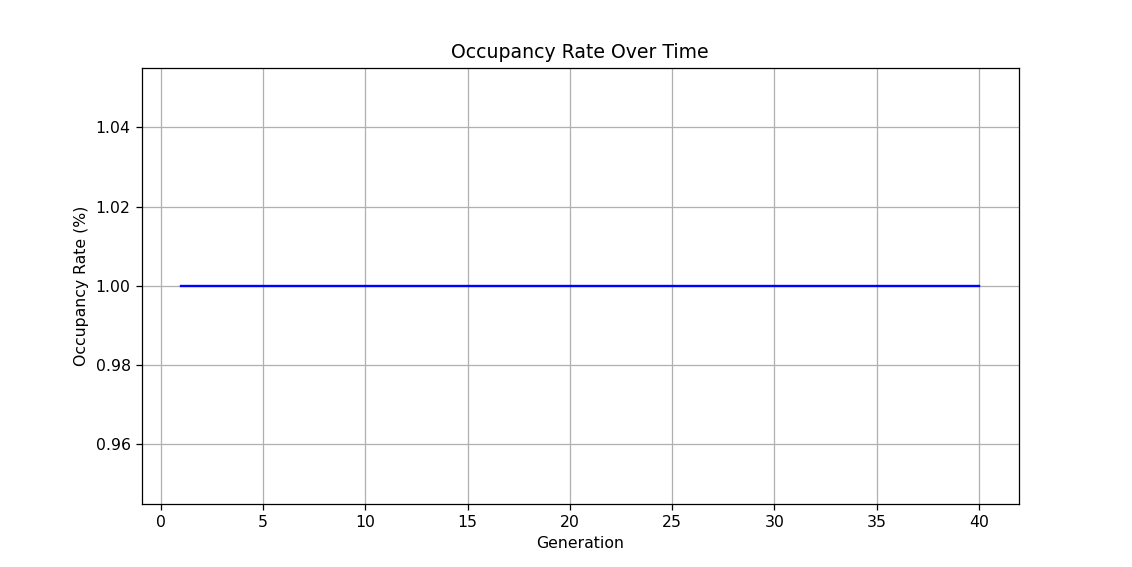

In [20]:
occupancy_rate(seed, n_gens=40)

In [23]:
frequency_of_replication(seed, n_gens=40)

NameError: name 'frequency_of_replication' is not defined

---------------

A finite pattern is called a *spaceship* if it reappears after a certain number of generations in the same orientation but in a different position. The smallest such number of generations is called the period of the spaceship.

Let's play Conway's Game of Life with a spaceship:

In [ ]:
glider = np.array([[1, 1, 1],
                   [0, 0, 1],
                   [0, 1, 0]])

In [ ]:
size = [15, 20]
seed = create_pattern(size, glider)

#plotting initial grid
draw_plot(*draw_grid('Glider'), seed)

In [ ]:
# play the game
play_gol(seed, 20, 50) # delta_t = 50 ms
period_of_replication(seed, n_gens=40)

In [ ]:
occupancy_rate(seed, n_gens=40)

------

Conway originally conjectured that no pattern can grow indefinitely and decided to offer a prize of fifty dollars (equivalent to $380 in 2022) to the first person who could prove or disprove the conjecture before the end of 1970. The prize was won in November by a team from the Massachusetts Institute of Technology, led by Bill Gosper; indeed the "Gosper glider gun" is the first known gun and the first known finite pattern with unbounded growth.

In [ ]:
gun = np.zeros((9,36), dtype=int)
gun[4, 0] = gun[5,0] = 1
gun[4, 1] = gun[5,1] = 1
gun[4, 10] = gun[5,10] = gun[6,10]= 1
gun[3, 11] = gun[7,11] =  1
gun[2, 12] = gun[8,12] =  1
gun[2, 13] = gun[8,13] =  1
gun[5, 14] =  1
gun[3, 15] = gun[7,15] =  1
gun[4, 16] = gun[5,16] = gun[6,16]= 1
gun[5,17] = 1
gun[2, 20] = gun[3,20] = gun[4,20]= 1
gun[2, 21] = gun[3,21] = gun[4,21]= 1
gun[1, 22] = gun[5,22] =  1
gun[0, 24] = gun[1,24] = gun[5,24]=gun[6,24]= 1
gun[2, -1] = gun[3,-1] = 1
gun[2, -2] = gun[3,-2] = 1

In [ ]:
size = [50, 90]
seed = create_pattern(size, gun)

#plotting initial grid
draw_plot(*draw_grid('Gosper glider gun'), seed)

In [ ]:
# play the game
play_gol(seed, 60, 20) # delta_t = 20 ms

In [ ]:
occupancy_rate(seed, n_gens=60)

--------